Remarks 250523
- Added initial cell to reload modules automatically 
- In `FormatData` definition
  - file paths are hardcoded -> either provide it as a fct parameter or mention in readme how names should be formatted
  - the line `self.adata.obs = metadata_df` rewrites `self.adata.obs_names` as well!! --> I don't know if this should later be fixed?
- In readme
  - in `FormatData` documentation, `.x_train` and `.x_test` are said to be DataFrames but I think they're arrays
  - `.selected_genes` are explained twice (and are the same info as `.genes`)
  - in `binary_pso` documentation, `current_data` is said to be a dataframe, but I think it is a `FormatData` object
- ??? Why are HVGs selected from training data ???
- In PSO algorithm the number of generations should be 5 but it runs for 6 nonono è che il codice ha settato le generazioni a 15 shit
- Why are there 2000 current genes but genes_list has 18116 elements?

In [1]:
# autoreload is used to reload modules automatically before entering the
# execution of code typed at the IPython prompt.
%load_ext autoreload
%autoreload 2

In [2]:
# import pickle
# import pandas as pd
# from PAGEpy import PAGEpy_utils

from PAGEpy import plot_functions
from PAGEpy import pso_PRISCA as pso
from PAGEpy.format_data_class import GeneExpressionDataset
from PAGEpy.models import PredAnnModel
import pickle
import pandas as pd
from PAGEpy import PAGEpy_utils

In [3]:
# memory growth is enabled for for the gpu
PAGEpy_utils.init_cuda()

In [5]:
# HVGs are selected by default, as opposed to the differential expression
current_data = GeneExpressionDataset(
    data_dir="../../HIVdata/",
    gene_selection="HVG",
    # gene_selection="Diff",
    pval_correction="benjamini-hochberg",
    hvg_count=2000,
    features_out_filename="features.pkl",
    train_samples_out_filename="train_samples.txt",
)

AnnData object successfully constructed.
AnnData object counts are now normalized.
Training samples: 4208, Test samples: 1053
Selected 2000 features using HVG


In [17]:
from PAGEpy.multiple_folds_class import KFoldData

kfolds = KFoldData(dataset=current_data)
for fold in kfolds:
    print(fold)

<IndividualFold: 3366 train, 842 test samples>
<IndividualFold: 3366 train, 842 test samples>
<IndividualFold: 3366 train, 842 test samples>
<IndividualFold: 3367 train, 841 test samples>
<IndividualFold: 3367 train, 841 test samples>


In [14]:
# the selected genes can be loaded from the local directory, however, they are also an attribte of the FormatData object
genes_path = "feature_set.pkl"
# TO DO: modify FormatData so that it is possible to manage this file

with open(genes_path, "rb") as f:
    current_genes = pickle.load(f)

In [6]:
# train the model;
# TODO: modify PredAnnModel to only create the model and not train it
# TODO: create a class DataFold (or something similar) to manage the dataset
initial_model = PredAnnModel(
    current_data, current_genes,
    n_epochs=500,
    # n_epochs=50,
    auc_threshold=1
)

Epoch 0, Avg Outcome Loss: 0.6882, Train AUC: 0.5166, Train Accuracy: 0.4518, Test AUC: 0.5125, Test Accuracy: 0.4520
Epoch 10, Avg Outcome Loss: 0.6701, Train AUC: 0.8667, Train Accuracy: 0.6091, Test AUC: 0.8561, Test Accuracy: 0.6059
Epoch 20, Avg Outcome Loss: 0.6613, Train AUC: 0.8684, Train Accuracy: 0.6587, Test AUC: 0.8584, Test Accuracy: 0.6591
Epoch 30, Avg Outcome Loss: 0.6504, Train AUC: 0.8701, Train Accuracy: 0.6573, Test AUC: 0.8596, Test Accuracy: 0.6591
Epoch 40, Avg Outcome Loss: 0.6378, Train AUC: 0.8739, Train Accuracy: 0.6868, Test AUC: 0.8638, Test Accuracy: 0.6857
Epoch 50, Avg Outcome Loss: 0.6253, Train AUC: 0.8749, Train Accuracy: 0.7015, Test AUC: 0.8648, Test Accuracy: 0.6971
Epoch 60, Avg Outcome Loss: 0.5959, Train AUC: 0.8756, Train Accuracy: 0.7481, Test AUC: 0.8654, Test Accuracy: 0.7436
Epoch 70, Avg Outcome Loss: 0.5508, Train AUC: 0.8770, Train Accuracy: 0.7719, Test AUC: 0.8660, Test Accuracy: 0.7664
Epoch 80, Avg Outcome Loss: 0.5417, Train AUC: 0.

Max train accuracy: 0.81
Max train AUC: 0.90
Max test accuracy: 0.80
Max test AUC: 0.88


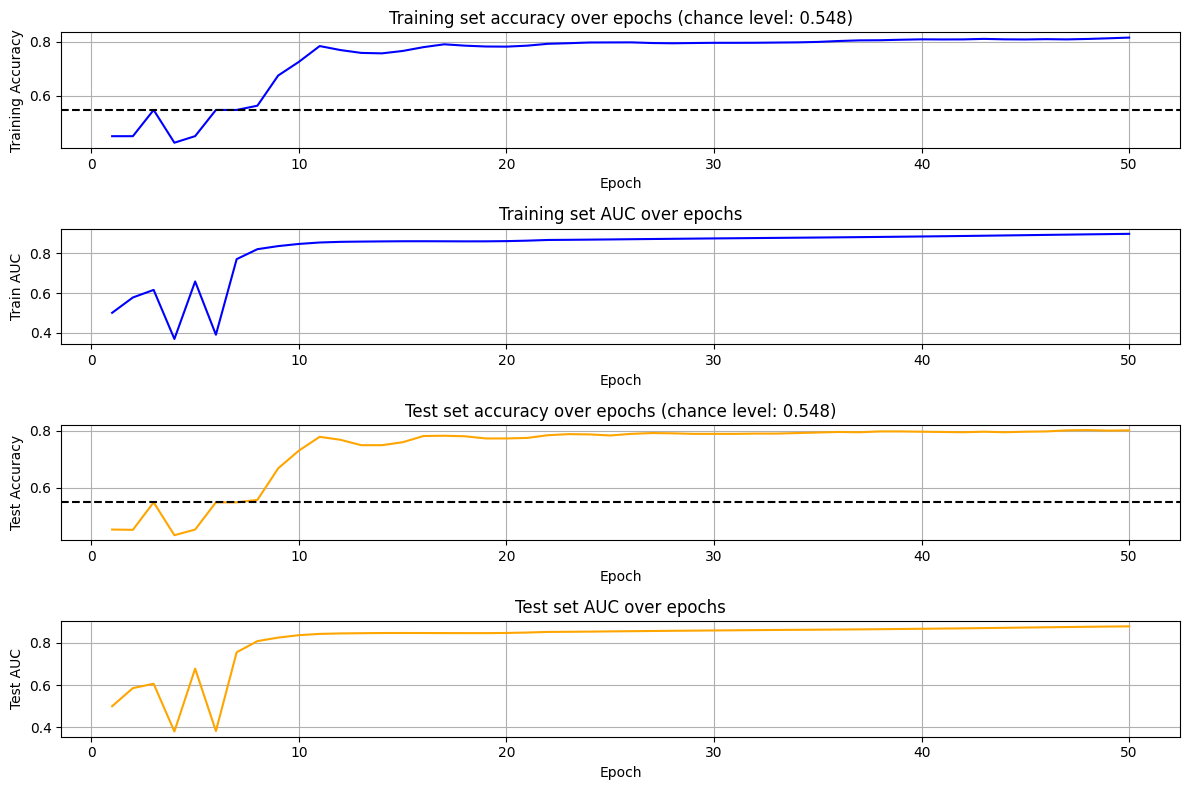

In [13]:
plot_functions.plot_model_history(
    model=initial_model,
    data=current_data,
    save_path=None)

In [8]:
# the pso algorithm can be use to optimze the solution
best_solution, best_fitness = pso.run_binary_pso(
    input_data=current_data,
    feature_names=current_genes,
    # pop_size=200,
    pop_size=5,
    # n_generations=15,
    n_generations=2,
    w=1,
    c1=2,
    c2=1.5,
    # n_reps=4,
    n_reps=1,
    # frequent_reporting=False,
    verbose=True,
    adaptive_metrics=False
)

Using mixed precision policy: mixed_float16
Training particle 1, generation 1 with 992 genes
  Fold 1/5: AUC = 0.9131
  Fold 2/5: AUC = 0.8887
  Fold 3/5: AUC = 0.8974
  Fold 4/5: AUC = 0.8781
  Fold 5/5: AUC = 0.8710
All folds completed for particle 1, generation 1
Average final test AUC value: 0.8899999856948853
Total time: 11.91562795639038 seconds
Training particle 2, generation 1 with 1002 genes
  Fold 1/5: AUC = 0.8922
  Fold 2/5: AUC = 0.8888
  Fold 3/5: AUC = 0.8767
  Fold 4/5: AUC = 0.8776
  Fold 5/5: AUC = 0.8832
All folds completed for particle 2, generation 1
Average final test AUC value: 0.8840000033378601
Total time: 12.160701036453247 seconds
Training particle 3, generation 1 with 974 genes
  Fold 1/5: AUC = 0.8972
  Fold 2/5: AUC = 0.8896
  Fold 3/5: AUC = 0.8927
  Fold 4/5: AUC = 0.8856
  Fold 5/5: AUC = 0.8840
All folds completed for particle 3, generation 1
Average final test AUC value: 0.8899999856948853
Total time: 11.951449155807495 seconds
Training particle 4, ge

# Example usage
results_dir = Path("results/pso_run_1")
particle_history, fitness_scores, selected_genes = load_pso_results(
    results_dir)

# Create plots directory
plots_dir = results_dir / "plots"
plots_dir.mkdir(exist_ok=True)

# Generate all plots
plot_pso_fitness_evolution(
    fitness_scores,
    save_path=plots_dir / "fitness_evolution.png"
)

plot_population_diversity(
    particle_history,
    save_path=plots_dir / "population_diversity.png"
)

plot_feature_selection_frequency(
    particle_history,
    n_features=len(selected_genes),
    save_path=plots_dir / "feature_frequency.png"
)

In [9]:
# the results of pso optimizatoin can be monitored
loaded_fitness_scores = pd.read_pickle("pso_fitness_scores.pkl")
loaded_particle_history = pd.read_pickle("pso_particle_history.pkl")

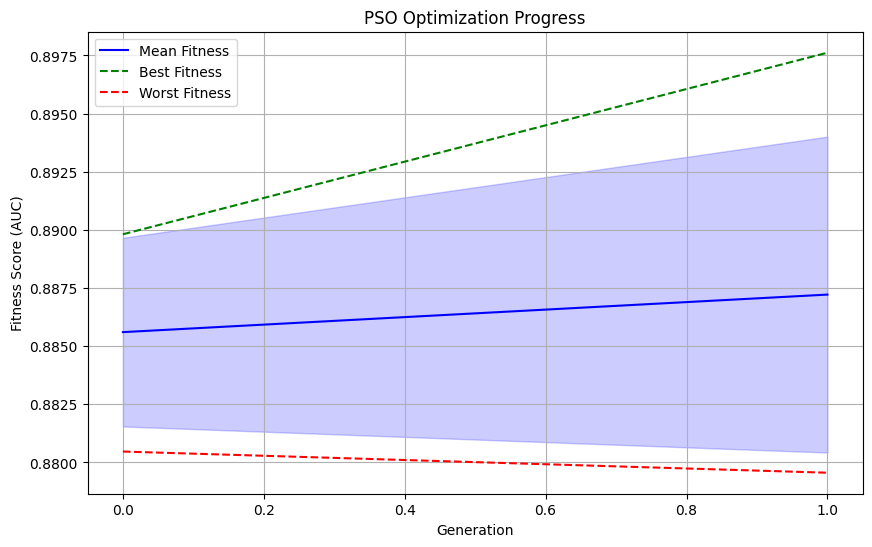

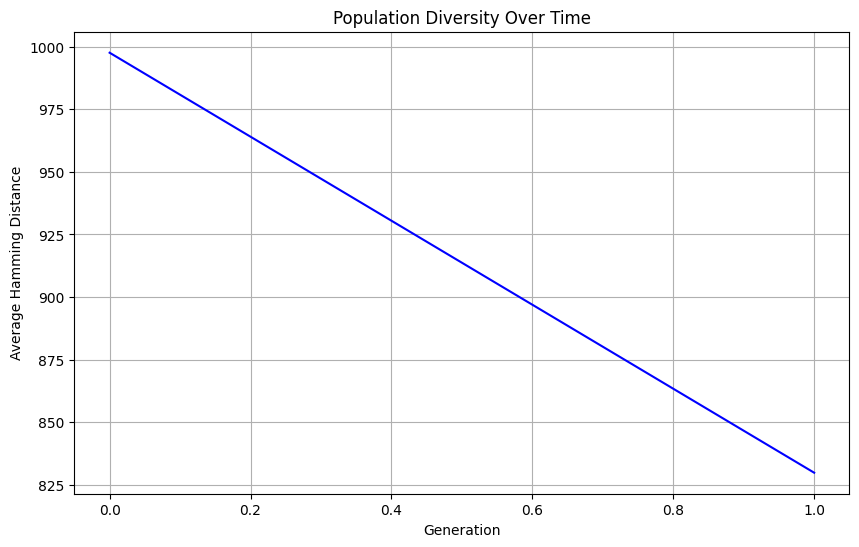

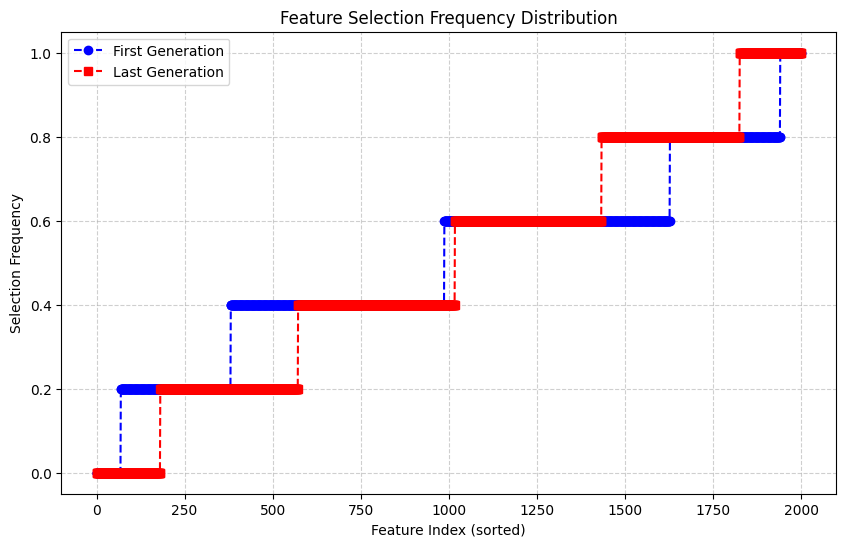

In [31]:
plot_functions.plot_pso_fitness_evolution(loaded_fitness_scores)
plot_functions.plot_population_diversity(loaded_particle_history)
plot_functions.plot_feature_selection_frequency(
    loaded_particle_history)

In [ ]:
# the optimised solution is saved locally, however, the returned varible from the binary_pso function can also be passed to the model (see below)
# pso_genes = [item for item, m in zip(current_genes, best_solution) if m == 1]

# othervise just load the locally stored result file

# Load the saved genes list
with open("pso_selected_genes.pkl", "rb") as f:
    pso_genes = pickle.load(f)

Epoch 0, Avg Outcome Loss: 0.6960, Train AUC: 0.6719, Train Accuracy: 0.5482, Test AUC: 0.6802, Test Accuracy: 0.5480
Epoch 10, Avg Outcome Loss: 0.4935, Train AUC: 0.8573, Train Accuracy: 0.7217, Test AUC: 0.8461, Test Accuracy: 0.7075
Epoch 20, Avg Outcome Loss: 0.4945, Train AUC: 0.8723, Train Accuracy: 0.7612, Test AUC: 0.8574, Test Accuracy: 0.7407
Epoch 30, Avg Outcome Loss: 0.4295, Train AUC: 0.8986, Train Accuracy: 0.8056, Test AUC: 0.8832, Test Accuracy: 0.8053
Epoch 40, Avg Outcome Loss: 0.4043, Train AUC: 0.8996, Train Accuracy: 0.8268, Test AUC: 0.8831, Test Accuracy: 0.8034
Epoch 50, Avg Outcome Loss: 0.3859, Train AUC: 0.9075, Train Accuracy: 0.8346, Test AUC: 0.8905, Test Accuracy: 0.8177
Epoch 60, Avg Outcome Loss: 0.3899, Train AUC: 0.9092, Train Accuracy: 0.8353, Test AUC: 0.8922, Test Accuracy: 0.8177
Epoch 70, Avg Outcome Loss: 0.3808, Train AUC: 0.9105, Train Accuracy: 0.8372, Test AUC: 0.8933, Test Accuracy: 0.8196
Epoch 80, Avg Outcome Loss: 0.3676, Train AUC: 0.

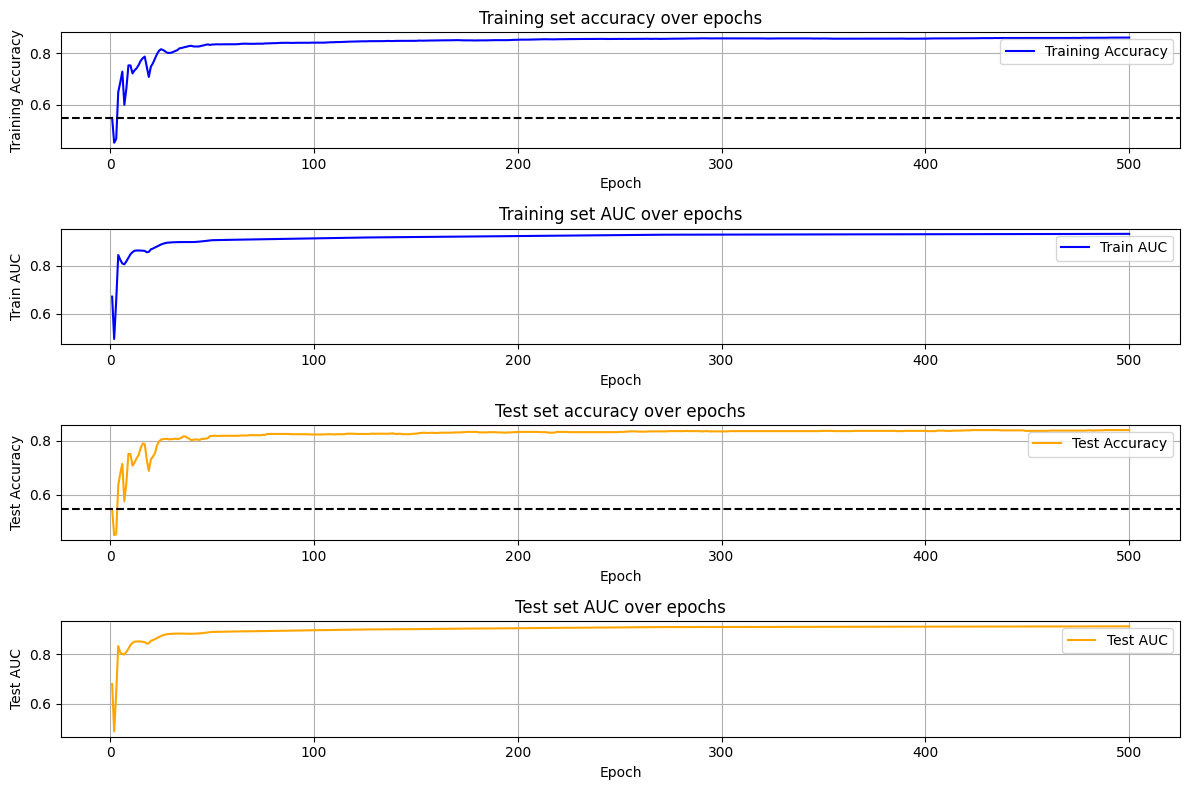

In [ ]:
# now use this gene list to train a new model, which you can then evaluate
improved_model = PredAnnModel(current_data, pso_genes, n_epochs=500)
plot_functions.plot_model_history(improved_model, current_data)